# Goodness of Fit and Contingency Tables

In [1]:
from IPython.display import Markdown
base_path = (
    "https://raw.githubusercontent.com/rezahabibi96/GitBook/refs/heads/main/"
    "books/applied-statistics-with-python/.resources"
)

In [14]:
import math
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.utils import resample
from scipy.stats import norm, binom, chi2, chisquare, chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import figure

import requests
from io import BytesIO

## Goodness of Fit

The goodness of fit refers to a method for assessing a distribution of binned data. It is best illustrated with an example.

**Example**

A shop owner wants to compare the number of t-shirts of each size that were sold to the ordered proportions. Assume the sold (observed) numbers of t-shirts and expected proportions for each type are as given in the first two columns in the following table:
| Size    | Observed | Expected Proportions | Expected Values |
| ------- | -------- | -------------------- | --------------- |
| Small   | 25       | 0.1                  | 22.5            |
| Medium  | 41       | 0.2                  | 45              |
| Large   | 91       | 0.4                  | 90              |
| X-Large | 68       | 0.3                  | 67.5            |

The total number of the shirts sold is $Total = 25 + 41 + 91 + 68 = 225$. If the sales follow the expected proportions, we would expect $225 \cdot 0.1 = 22.5$ small shirts to be sold, $225 \cdot 0.2 = 45$ medium, etc. (see the column of the Expected Values in the table above).

The numbers of shirts of each type (observed values) are quite close to the expected values in this case (not the same due to sampling variation). Are the differences large enough to indicate that the observed (sample) sales do not follow the expected (population) sales.

Let's formulate it as a hypothesis test:

$H_0$: The observed sales follow the expected proportions or $O \approx E$ (no bias, natural sampling fluctuation).

$H_1$: The observed sales do NOT follow the expected proportions or $O \ne E$.

In the hypothesis tests for proportions, a test statistic was:

$$ \dfrac{\text{point estimate} - \text{null estimate}}{\text{SE of point estimate}} $$

As always in hypothesis testing, the null hypothesis $H_0$ is initially assumed true, so the expected counts $E$’s are taken as null estimates. In Mathematical Statistics, it is shown that standard error $SE = \sqrt{E}$. Therefore, the standardized residuals for each category are

$$ \dfrac{O_i - E_i}{\sqrt{E_i}} $$

where $i$’s refer to category (Small, Medium, etc.). As always, residuals have varying signs, so adding them would lead to cancellations; instead their squares are considered.

Let $O_1, O_2, ..., O_k$ be the observed counts in $k$ groups, and $E_1, E_2, ..., E_k$ be the corresponding expected counts under a null hypothesis. Then provided that all $E_i \geq 5$, the **Chi-Squared test statistic**

$$ \chi^2 = \dfrac{(O_1 - E_1)^2}{E_1} + \dfrac{(O_2 - E_2)^2}{E_2} + ... + \dfrac{(O_k - E_k)^2}{E_k} $$

follows a chi-squared distribution with $k - 1$ degrees of freedom. A larger difference between observed and expected values (against $H_0$) leads to larger $\chi^2$, so the p-value is the upper tail area of this chi-squared distribution.

Unlike the normal distribution, the $\chi^2$ is a family of distributions with different shapes based on the degree of freedom. It is skewed right, not symmetric as shown by the code and the resulting Figure below.

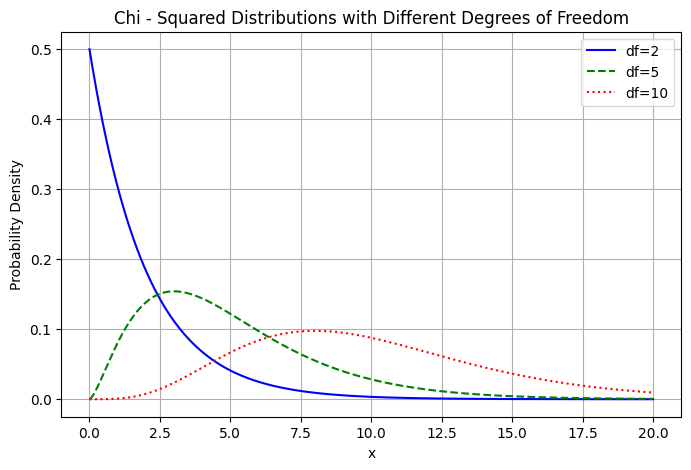

In [ ]:
# Parameters for the chi - squared distributions
df_values = [2, 5, 10] # Degrees of freedom
x = np.linspace(0, 20, 500) # x- values for the plots

# Line styles and colors for the distributions
linestyles = ['-', '--', ':']
colors = ['blue', 'green', 'red']

# Plotting the chi - squared distributions
plt.figure (figsize=(8, 5))
for df, ls, color in zip (df_values, linestyles, colors):
    y = chi2.pdf (x, df) # Compute the PDF of the chi - squared distribution
    plt.plot (x, y, linestyle=ls, color=color, label=f"df={df}")

# Add title , labels , legend , and grid
plt.title("Chi - Squared Distributions with Different Degrees of Freedom")
plt.xlabel("x")
plt.ylabel ("Probability Density")
plt.legend()
plt.grid(True)
plt.show()



For our data:

$$ \chi^2 = \dfrac{(O_1 - E_1)^2}{E_1} + \dfrac{(O_2 - E_2)^2}{E_2} + ... + \dfrac{(O_k - E_k)^2}{E_k} $$

$$ = \dfrac{(25 - 22.5)^2}{22.5} + \dfrac{(41 - 45)^2}{45} + ... + \dfrac{(68 - 67.5)^2}{67.5} $$

$$ = 0.278 + 0.356 + ... + 0.004 = 0.648 $$

The function defined below computes the steps of the goodness of fit method and plots a chi-squared distribution with $df = k - 1 = 4 - 1 = 3$ degrees of freedom with the shaded area corresponding to the p-value as shown in the Figure below.

In [6]:
def GoodnessFit(Observed,BinNames,Pexpect):
    O = np.array(Observed)
    P_exp = np.array(Pexpect)
    n = len(O)
    total = np.sum(O)
    print("Total Observed = {:d} + {:d} + ... {:d} = {:d}".format(O[0],O[1],O[n-1], total))

    E = total*P_exp
    print("Expected frequencies = E = total*P_exp ={:d}*[{:.3f},{:.3f},....,{:.3f}]=".format(total,P_exp[0],P_exp[1],P_exp[n-1]))
    print(' [{:.3f},{:.3f},....,{:.3f}]'.format(E[0],E[1],E[n-1]))
    print('Residuals = (Observed - Expected)/sqrt(Expected) = ')
    print('=({:d}-{:.2f})/sqrt({:.2f}), ... , ({:d}-{:.2f})/sqrt({:.2f})\n'.format(O[0],E[0],E[0],O[n-1],E[n-1],E[n-1]))
    
    R = (O-E)/np.sqrt(E)
    R2 = R**2
    Frame = pd.DataFrame({'Observed': O, 'Expected P': P_exp, 'Expected': E, 'Residuals': R, 'Residuals**2': R2})
    Frame.index = BinNames
    
    pd.set_option("display.precision", 4)
    print(Frame,'\n')
    df = len(O)-1
    print("df = len(O)-1 ={:d}-1 = {:d}".format(len(O),df))

    X2 = np.sum(R2)
    print('Chi-Squared = sum( (O-E)**2/E )= sum( Residuals**2) = ')
    print('=({:d}-{:.2f})**2/{:.2f} + ... + ({:d}-{:.2f})**2/{:.2f} = {:.3f}'.format(O[0],E[0],E[0],O[n-1],E[n-1],E[n-1],X2))

    pval = 1 - chi2.cdf(X2,df)
    print('p-value = 1 - chi2.cdf(X2,df) = ', pval, '\n')

    (X2, pval) = chisquare(f_obs=O,f_exp=E)
    print("From chisquare function: X2 = ", round(X2,3), ' pval = ', pval)

    x = np.arange(0, X2+10, 0.001) #x-axis 0 to 20 with .001 steps
    P1 = plt.plot(x, chi2.pdf(x, df=df)) #plot Chi-square

    xR=np.arange(X2,X2+10,0.001)
    plt.fill_between(xR,chi2.pdf(xR, df=df),color='r') # filling for p-value
    
    plt.show(P1)
    Frame[['Observed','Expected']].plot(kind='bar') # observed barplot


Total Observed = 25 + 41 + ... 68 = 225
Expected frequencies = E = total*P_exp =225*[0.100,0.200,....,0.300]=
 [22.500,45.000,....,67.500]
Residuals = (Observed - Expected)/sqrt(Expected) = 
=(25-22.50)/sqrt(22.50), ... , (68-67.50)/sqrt(67.50)

         Observed  Expected P  Expected  Residuals  Residuals**2
Small          25         0.1      22.5     0.5270        0.2778
Medium         41         0.2      45.0    -0.5963        0.3556
Large          91         0.4      90.0     0.1054        0.0111
X-Large        68         0.3      67.5     0.0609        0.0037 

df = len(O)-1 =4-1 = 3
Chi-Squared = sum( (O-E)**2/E )= sum( Residuals**2) = 
=(25-22.50)**2/22.50 + ... + (68-67.50)**2/67.50 = 0.648
p-value = 1 - chi2.cdf(X2,df) =  0.8853267818237286 

From chisquare function: X2 =  0.648  pval =  0.8853267818237286


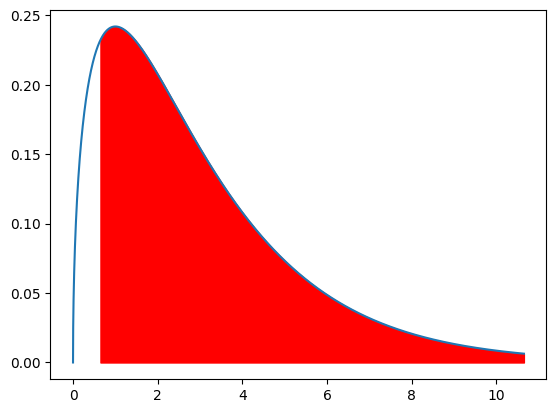

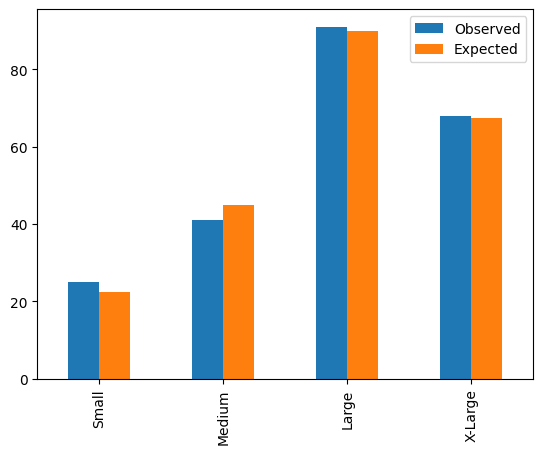

In [7]:
GoodnessFit(Observed=[25, 41, 91, 68], BinNames=["Small","Medium","Large","X-Large"], Pexpect=[0.1, 0.2, 0.4, 0.3])


For our example, the observed $O$’s are very close to the expected $E$’s, leading to very small $\chi^2 = 0.648$, which results in a very large p-value $= 0.8853268 > 0.05$ as shown in the chi-squared distribution Figure above. Therefore, there is not enough evidence to reject $H_0$, and the observed shirt sales follow the expected proportions. We can also see it in the side-by-side bar plot of the observed and expected counts above.

**Example**

The data for a particular hospital's emergency room admissions over the previous month are given below. To properly allocate resources, investigate if the admissions are *uniformly* distributed by the day of the week.

$H_0$: The observed values of the number of hospital admissions follow the expected proportions $O \approx E$ (equally likely 7 days, so $p_i = 1/7$).

$H_1$: The observed values do NOT follow the expected proportions $O \ne E$.

Total Observed = 99 + 72 + ... 92 = 535
Expected frequencies = E = total*P_exp =535*[0.143,0.143,....,0.143]=
 [76.429,76.429,....,76.429]
Residuals = (Observed - Expected)/sqrt(Expected) = 
=(99-76.43)/sqrt(76.43), ... , (92-76.43)/sqrt(76.43)

     Observed  Expected P  Expected  Residuals  Residuals**2
Sun        99      0.1429   76.4286     2.5819        6.6660
Mon        72      0.1429   76.4286    -0.5066        0.2566
Tue        69      0.1429   76.4286    -0.8497        0.7220
Wed        62      0.1429   76.4286    -1.6504        2.7239
Thr        67      0.1429   76.4286    -1.0785        1.1632
Fri        74      0.1429   76.4286    -0.2778        0.0772
Sat        92      0.1429   76.4286     1.7812        3.1725 

df = len(O)-1 =7-1 = 6
Chi-Squared = sum( (O-E)**2/E )= sum( Residuals**2) = 
=(99-76.43)**2/76.43 + ... + (92-76.43)**2/76.43 = 14.781
p-value = 1 - chi2.cdf(X2,df) =  0.022027570437209598 

From chisquare function: X2 =  14.781  pval =  0.022027570437209612


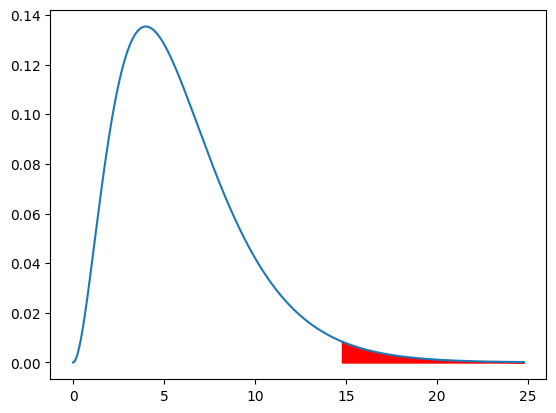

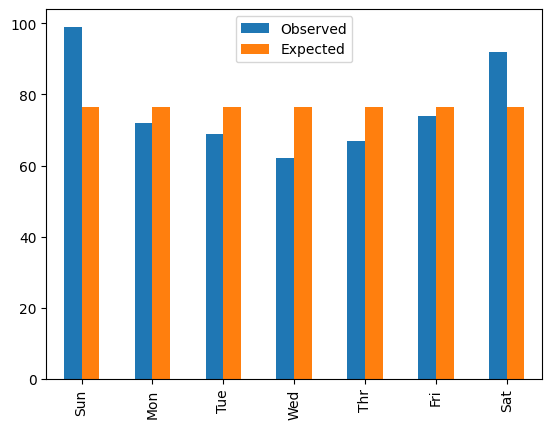

In [8]:
GoodnessFit(Observed=[99,72,69,62,67,74,92], BinNames=['Sun','Mon','Tue','Wed','Thr','Fri','Sat'], Pexpect=[1/7,1/7,1/7,1/7,1/7,1/7,1/7])


Adding the observed values, we obtain $Total = 535$. If the observed values follow the expected proportions, $535 \cdot \frac{1}{7} \approx 76.429$ admissions are expected on Sun, the same on other days. All the Expected Values are given in the table above and none is below 5. The resulting test statistic $\chi^2$ is:

$$ \chi^2 = \dfrac{(O_1 - E_1)^2}{E_1} + \dfrac{(O_2 - E_2)^2}{E_2} + ... + \dfrac{(O_k - E_k)^2}{E_k} $$

$$ = \dfrac{(99 - 76.429)^2}{76.429} + \dfrac{(72 - 76.429)^2}{76.429} + ... + \dfrac{(92 - 76.429)^2}{76.429} $$

$$ = 6.666 + 0.257 + ... + 3.172 = 14.781 $$

The $\chi^2$ degree of freedom is $df = k - 1 = 7 - 1 = 6$.

The $\chi^2 = 14.781$ with the degree of freedom $df = 6$ is sufficiently large to produce small p-value $= 0.0220276 < 0.05$ as shown in the chi-squared distribution Figure above. Therefore, there is enough evidence to reject $H_0$, i.e., the observed calls on different days of the week are not uniformly distributed. We can see from the table that there are more emergency visits on weekends when regular doctors are not available. We can also see it in the side-by-side bar plot of the observed and expected counts above.

**Example**

In the HELPrct file on substance abusers' health data, investigate if the substance variable is equally distributed between alcohol, cocaine, and heroin. Note that we employ value_counts() to get the counts for each substance level.

$H_0$: The observed values of the substance abusers in each group follow the expected proportions $O \approx E$ (equally likely).

$H_1$: The observed values do NOT follow the expected proportions or $O \ne E$.

In [9]:
url=f'{base_path}/HELPrct.csv'
mydata = pd.read_csv(url) # save as mydata file

counts = mydata['substance'].value_counts()
counts

alcohol    177
cocaine    152
heroin     124
Name: substance, dtype: int64

Total Observed = 177 + 152 + ... 124 = 453
Expected frequencies = E = total*P_exp =453*[0.333,0.333,....,0.333]=
 [151.000,151.000,....,151.000]
Residuals = (Observed - Expected)/sqrt(Expected) = 
=(177-151.00)/sqrt(151.00), ... , (124-151.00)/sqrt(151.00)

         Observed  Expected P  Expected  Residuals  Residuals**2
alcohol       177      0.3333     151.0     2.1158        4.4768
cocaine       152      0.3333     151.0     0.0814        0.0066
heroin        124      0.3333     151.0    -2.1972        4.8278 

df = len(O)-1 =3-1 = 2
Chi-Squared = sum( (O-E)**2/E )= sum( Residuals**2) = 
=(177-151.00)**2/151.00 + ... + (124-151.00)**2/151.00 = 9.311
p-value = 1 - chi2.cdf(X2,df) =  0.009507929549892102 

From chisquare function: X2 =  9.311  pval =  0.009507929549892056


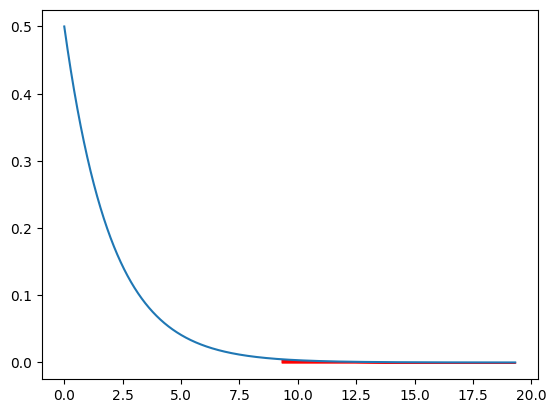

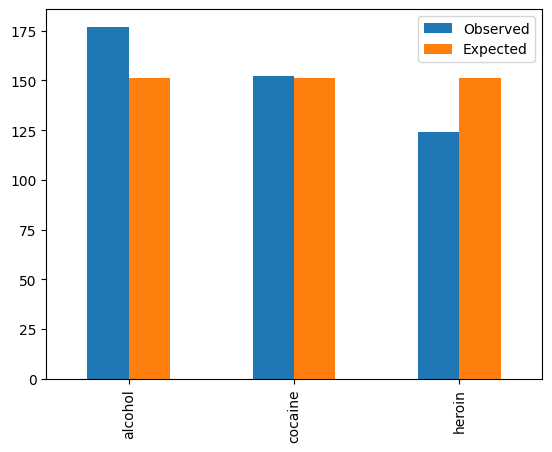

In [10]:
GoodnessFit(Observed=[177,152,124], BinNames=['alcohol','cocaine','heroin'], Pexpect=[1/3,1/3,1/3])


The observed values add up to $Total = 453$. If the observed values follow the expected proportions, $453 \cdot \frac{1}{3} = 151$ should be the expected count for each substance (none of them is below 5). The resulting test statistic $\chi^2$ is:

$$ \chi^2 = \dfrac{(O_1 - E_1)^2}{E_1} + \dfrac{(O_2 - E_2)^2}{E_2} + ... + \dfrac{(O_k - E_k)^2}{E_k} $$

$$ = \dfrac{(177 - 151)^2}{151} + \dfrac{(152 - 151)^2}{151} + \dfrac{(124 - 151)^2}{151} $$

$$ = 4.477 + 0.007 + 4.828 = 9.311 $$

The chi-squared distribution with $df = k - 1 = 3 - 1 = 2$ degrees of freedom is shown in the Figure above. Here, $\chi^2 = 9.311$ and the resulting p-value $= 0.0095 < 0.05$, as shown in the chi-squared distribution Figure above.

Thus, there is enough evidence to reject $H_0$; the substances are not distributed equally. There are more alcoholics than any other kind. It can also be seen in the side-by-side bar plot of the observed and expected counts above.

**Example**

An M&M candy pack is supposed to have 23% blue, 23% orange, 15% green, 15% yellow, 12% red, and 12% brown candies. A random sample of several packs is selected and different colors are counted. Do the observed counts follow the claimed proportions?

$H_0$: The observed counts of colors follow the expected proportions $O \approx E$.

$H_1$: The observed values do NOT follow the expected proportions or $O \ne E$.

Total Observed = 58 + 69 + ... 29 = 289
Expected frequencies = E = total*P_exp =289*[0.230,0.230,....,0.120]=
 [66.470,66.470,....,34.680]
Residuals = (Observed - Expected)/sqrt(Expected) = 
=(58-66.47)/sqrt(66.47), ... , (29-34.68)/sqrt(34.68)

        Observed  Expected P  Expected  Residuals  Residuals**2
Blue          58        0.23     66.47    -1.0389        1.0793
Orange        69        0.23     66.47     0.3103        0.0963
Green         50        0.15     43.35     1.0100        1.0201
Yellow        42        0.15     43.35    -0.2050        0.0420
Red           41        0.12     34.68     1.0732        1.1517
Brown         29        0.12     34.68    -0.9645        0.9303 

df = len(O)-1 =6-1 = 5
Chi-Squared = sum( (O-E)**2/E )= sum( Residuals**2) = 
=(58-66.47)**2/66.47 + ... + (29-34.68)**2/34.68 = 4.320
p-value = 1 - chi2.cdf(X2,df) =  0.5043501118366657 

From chisquare function: X2 =  4.32  pval =  0.5043501118366656


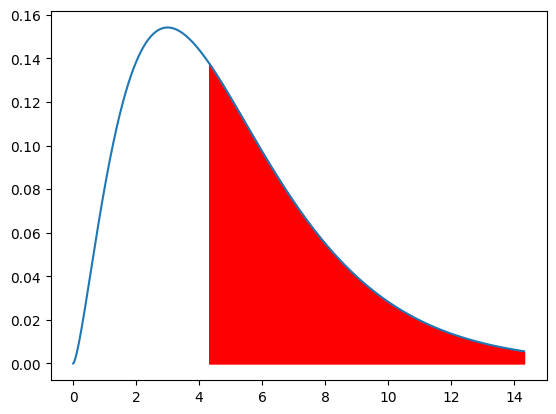

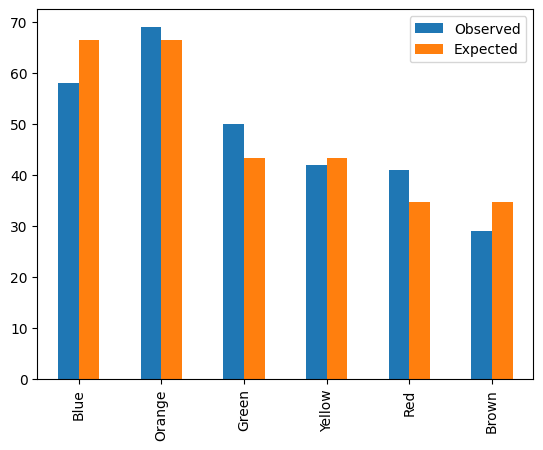

In [11]:
GoodnessFit(Observed=[58, 69, 50, 42, 41, 29], BinNames=["Blue","Orange","Green","Yellow","Red","Brown"], Pexpect=[0.23,0.23,0.15,0.15,0.12,0.12])

Observed values sum up to $Total = 289$. If they follow the expected proportions, there should be $289 \cdot 0.23 \approx 66.47$ Blue, etc. The Expected Values are in the table above, none of them is below 5. The resulting test statistic $\chi^2$ is:

$$ \chi^2 = \dfrac{(O_1 - E_1)^2}{E_1} + \dfrac{(O_2 - E_2)^2}{E_2} + ... + \dfrac{(O_k - E_k)^2}{E_k} $$

$$ = \dfrac{(58 - 66.47)^2}{66.47} + \dfrac{(69 - 66.47)^2}{66.47} + ... + \dfrac{(29 - 34.68)^2}{34.68} $$

$$ = 1.079 + 0.096 + ... + 0.93 = 4.32 $$

The chi-squared distribution with $df = k - 1 = 6 - 1 = 5$ degrees of freedom is shown above. The $\chi^2 = 4.32$ is small and produces a very large p-value $= 0.5044 > 0.05$ (very large right tail) as shown in the chi-squared distribution Figure above. Thus, there is NOT enough evidence to reject $H_0$, so the observed colors of candies follow the manufacturer's proportions claim. We can also see it in the side-by-side bar plot of the observed and expected counts above.

**Example**

For a number of numerical data sets, the leading digit distribution is surprisingly heavily skewed right (Benford Law): leading 1 – 30% likely, leading 2 – 17.6%, …, leading 9 < 5%. If they were uniformly distributed, each of the nine digits would occur about 11.1% of the time. The formula for the probability distribution of the first digit $d = 1, 2, ..., 9$ is given by:

$$ P(d) = \log_{10}(d + 1) - \log_{10}(d) = \log_{10}\left(1 + \frac{1}{d}\right) $$

The observed counts of leading digits from a large financial document are given below. Do they follow Benford Law?

$H_0$: The observed values of the leading digits follow the expected proportions $O \approx E$.

$H_1$: The observed values do NOT follow the expected proportions or $O \ne E$.

In [12]:
nv = np.arange(1,10)
P_exp = np.array(np.log10(nv+1)-np.log10(nv))
P_exp
# log10(2)-log10(1), log10(3)-log10(2), log10(4)-log10(3)

array([0.30103   , 0.17609126, 0.12493874, 0.09691001, 0.07918125,
       0.06694679, 0.05799195, 0.05115252, 0.04575749])

Total Observed = 1110 + 601 + ... 156 = 3542
Expected frequencies = E = total*P_exp =3542*[0.301,0.176,....,0.046]=
 [1066.248,623.715,....,162.073]
Residuals = (Observed - Expected)/sqrt(Expected) = 
=(1110-1066.25)/sqrt(1066.25), ... , (156-162.07)/sqrt(162.07)

   Observed  Expected P   Expected  Residuals  Residuals**2
1      1110      0.3010  1066.2482     1.3399        1.7953
2       601      0.1761   623.7152    -0.9095        0.8273
3       462      0.1249   442.5330     0.9254        0.8564
4       345      0.0969   343.2553     0.0942        0.0089
5       260      0.0792   280.4600    -1.2217        1.4926
6       223      0.0669   237.1255    -0.9173        0.8415
7       205      0.0580   205.4075    -0.0284        0.0008
8       180      0.0512   181.1822    -0.0878        0.0077
9       156      0.0458   162.0730    -0.4770        0.2276 

df = len(O)-1 =9-1 = 8
Chi-Squared = sum( (O-E)**2/E )= sum( Residuals**2) = 
=(1110-1066.25)**2/1066.25 + ... + (156-162.07)**2/162.

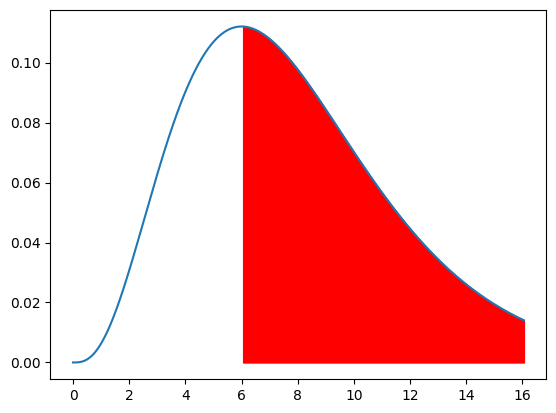

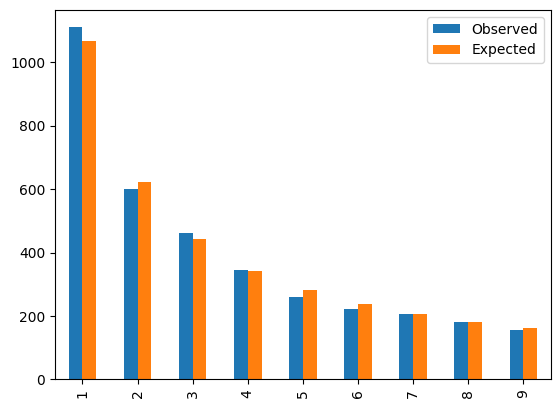

In [13]:
GoodnessFit(Observed=[1110,601,462,345,260,223,205,180,156], BinNames=["1","2","3","4","5","6","7","8","9"], Pexpect=P_exp)


The observed counts add up to $Total = 3542$. If the observed counts follow the expected proportions, $3542 \cdot 0.301 \approx 1066.248$ of the leading digits should be 1, etc. The Expected Values are shown in the table and the second Figure above, none of them is below 5. The resulting test statistic $\chi^2$ is:

$$ \chi^2 = \dfrac{(O_1 - E_1)^2}{E_1} + \dfrac{(O_2 - E_2)^2}{E_2} + ... + \dfrac{(O_k - E_k)^2}{E_k} $$

$$ = \dfrac{(1110 - 1066.248)^2}{1066.248} + \dfrac{(601 - 623.715)^2}{623.715} + ... + \dfrac{(156 - 162.073)^2}{162.073} $$

$$ = 1.795 + 0.827 + ... + 0.228 = 6.058 $$

The $\chi^2$ follows a chi-squared distribution with $df = k - 1 = 9 - 1 = 8$ degrees of freedom shown in the Figure above. Here, $\chi^2 = 6.058$ is quite small, resulting in a very large p-value $= 0.64 > 0.05$ (right tail in the chi-squared plot in the Figure above). Therefore, there is NOT enough evidence to reject $H_0$; the observed distribution of leading digits in this financial report follows Benford's law. We can also see it in the side-by-side bar plot of the observed and expected counts above.

## Chi-Squared Test of Independence in a Two-Way Table

Here’s your text reformatted according to your rules ✅

In this section, two-way contingency tables of frequency counts for categorical data are studied to assess whether there is a dependence between these two variables.

**Example**

A supplement company claims that their extract is effective in preventing common cold viruses. Healthy volunteers randomized into groups were given a placebo, low dose, or high dose of the supplement and exposed to a cold virus. The results are summarized in the Table below. Test the claim that getting a cold infection is independent of the treatment group (i.e., row and column variables are independent) at a 5% level.
|              | Placebo | Low Dose | High Dose | Sum |
| ------------ | ------- | -------- | --------- | --- |
| Infected     | 10      | 28       | 31        | 69  |
| Not Infected | 40      | 60       | 64        | 164 |
| Sum          | 50      | 88       | 95        | 233 |

$H_0$: Getting an infection is independent of the treatment (i.e., **row and column variables are independent**).

$H_1$: **Dependent**.

The $\chi^2$ statistic approach is used again, but what are the expected counts?

As always, initially assume $H_0$ is true — getting an infection is independent of the treatment group. Let's concentrate on a particular cell in the upper left corner:

$$ P(\text{Infected and Placebo}) = [H_0 \text{ true } \Rightarrow \text{independent}]$$

$$= P(\text{Infected}) \cdot P(\text{Placebo}) = \frac{69}{233} \cdot \frac{50}{233}$$

Therefore, the expected count in this cell should be:

$$ E = (\text{Grand Total}) \cdot (\text{Probability}) = 233 \cdot \frac{69}{233} \cdot \frac{50}{233} = \frac{69 \cdot 50}{233} $$

Therefore, the expected value in each cell is given by:

$$ E = \frac{(\text{Row Total}) \cdot (\text{Column Total})}{\text{Grand Total}} $$

Therefore:

$$ E_{1,1} = \frac{69 \cdot 50}{233} = 14.807 $$
$$ E_{1,2} = \frac{69 \cdot 88}{233} = 26.06 $$
…
$$ E_{2,3} = \frac{164 \cdot 95}{233} = 66.87 $$

Given the expected counts, the same $\chi^2$ computations as in Goodness of Fit are performed, but the degree of freedom is:

$$ df = (\text{number of rows} - 1)(\text{number of columns} - 1) = (2 - 1)(3 - 1) = 2 $$

To illustrate this degree of freedom, let's consider the same contingency table as above, but specify only two cell entries. Then all other entries could be found by subtracting from the totals. For example, the entry for Infected and High Dose is $69 - 10 - 28 = 31$, or Not Infected and Placebo is $50 - 10 = 40$.
|              | Placebo | Low Dose | High Dose | Sum |
| ------------ | ------- | -------- | --------- | --- |
| Infected     | 10      | 28       | ?         | 69  |
| Not Infected | ?       | ?        | ?         | 164 |
| Sum          | 50      | 88       | 95        | 233 |

The $\chi^2$ statistic is

$$ \chi^2 = \dfrac{(O_{1,1} - E_{1,1})^2}{E_{1,1}} + \dfrac{(O_{2,1} - E_{2,1})^2}{E_{2,1}} + ... + \dfrac{(O_{2,3} - E_{2,3})^2}{E_{2,3}} $$

$$ = \dfrac{(10 - 14.807)^2}{14.807} + \dfrac{(28 - 26.060)^2}{26.060} + ... + \dfrac{(64 - 66.867)^2}{66.867} $$

$$ = 1.56 + 0.144 + ... + 0.123 = 2.837 $$

The $\chi^2$ follows a chi-squared distribution with $df = (2 - 1)(3 - 1) = 2$ degrees of freedom shown in the Figure below. $\chi^2 = 2.837$ is very small and results in a very large p-value $= 0.2420422 > 0.05$ (the right tail in the Figure).

Therefore, there is NOT enough evidence to reject $H_0$, so getting infected is independent of the treatment group, which implies that the supplement is not effective.

Note in the code below that the counts must be entered column-by-column, and row names are in the data frame index. The second Figure shows a stacked barplot of the data.

In [15]:
def ChiSqIndependence(Observed):
    O = Observed
    nr = Observed.shape[0]
    nc = Observed.shape[1]

    Om = pd.DataFrame.copy(O) # creating margins
    Om['Sum'] = O.sum(axis=1)

    rowsum = O.sum(axis=1)
    colsum = O.sum(axis=0)

    Om.loc[len(Om.index)] = colsum.tolist() + [O.sum().sum()]

    print(Om)
    print('nr, nc = ', nr,nc)

    chi_val, p_val, dof, E = chi2_contingency(O,correction=False)
    print('Expected in cell E00 = {:d}*{:d}/{:d} = {:.3f}'.format(rowsum[0],colsum[0],O.sum().sum(),E[0,0]))
    print('Expected in cell E01 = {:d}*{:d}/{:d} = {:.3f}'.format(rowsum[0],colsum[1],O.sum().sum(),E[0,1]))
    print('Expected in the last cell = {:d}*{:d}/{:d} = {:.3f}'.format(rowsum[nr-1],colsum[nc-1],O.sum().sum(),E[nr-1,nc-1]))
    print('Chi-Squared = sum( (O-E)**2/E )= sum( Residuals**2) = ')
    print('=({:d}-{:.2f})**2/{:.2f} + ... + ({:d}-{:.2f})**2/{:.2f} = {:.3f}'.format(O.iloc[0,0],E[0,0],E[0,0],O.iloc[nr-1,nc-1], \
    
    E[nr-1,nc-1],E[nr-1,nc-1],chi_val)) 
    print('degree of freedom = df =(nr-1)(nc-1)= ({:d}-1)({:d}-1) = {:d}'.format(nr,nc,dof))

    pval = 1 - chi2.cdf(chi_val,df=dof)
    print('pval = 1 - chi2.cdf(X2,df) = ',pval,'\n')
    print("From built-in chi-squared : X2 = ", round(chi_val,3), ' pval = ', pval)
    print("Expected: ")
    print(E)
    
    x = np.arange(0, chi_val+10, 0.001)
    P1 = plt.plot(x, chi2.pdf(x, df=dof))

    xR=np.arange(chi_val,chi_val+10,0.001)
    plt.fill_between(xR,chi2.pdf(xR, df=dof),color='r') # filling for p-value

    plt.show(P1)
    O.plot.bar(stacked=True)

             Placebo  LowDose  HighDose  Sum
Infected          10       28        31   69
NotInfected       40       60        64  164
2                 50       88        95  233
nr, nc =  2 3
Expected in cell E00 = 69*50/233 = 14.807
Expected in cell E01 = 69*88/233 = 26.060
Expected in the last cell = 164*95/233 = 66.867
Chi-Squared = sum( (O-E)**2/E )= sum( Residuals**2) = 
=(10-14.81)**2/14.81 + ... + (64-66.87)**2/66.87 = 2.837
degree of freedom = df =(nr-1)(nc-1)= (2-1)(3-1) = 2
pval = 1 - chi2.cdf(X2,df) =  0.24204221633323164 

From built-in chi-squared : X2 =  2.837  pval =  0.24204221633323164
Expected: 
[[14.80686695 26.06008584 28.13304721]
 [35.19313305 61.93991416 66.86695279]]


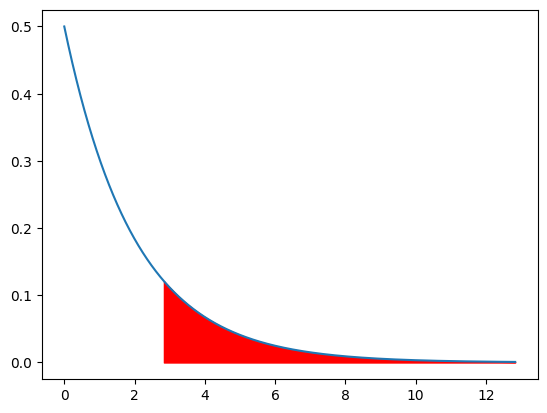

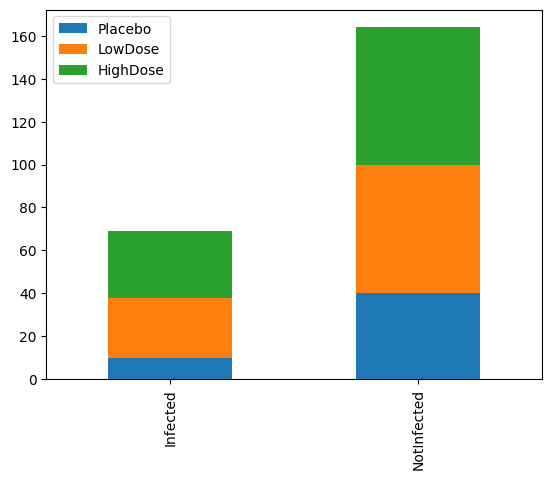

In [ ]:
O = pd.DataFrame({'Placebo':[10,40], 'LowDose':[28,60], 'HighDose':[31,64]},
                 index= ['Infected','NotInfected'])
ChiSqIndependence(O)

Note that when there are only two rows (as in this case) or only two columns, we can look at this problem from the proportion comparison point of view:

$H_0$: $p_1 = p_2 = p_3$ — proportions of infected individuals in each treatment group are the same.

$H_1$: At least one of the proportions is different.

As such, it is a generalization of the two-proportion test studied before. In fact, the proportions of infected individuals in our example are given below for Placebo, low dose, and high dose of the supplement, respectively.

In [ ]:
O.iloc[0,:]/O.sum(axis=0)

Placebo     0.2000
LowDose     0.3182
HighDose    0.3263
dtype: float64

**Example**

A polling company conducted a study to determine the support for the National healthcare plan among randomly chosen respondents with different party affiliations. The data are shown in the code below. Test the claim that the response is independent of the party affiliation (i.e., row and column variables are independent).

$H_0$: The response is independent of the party affiliation (i.e., row and column variables are independent)

$H_1$: Dependent

Let's start with the code and then explain the steps. Note that none of the expected counts are below 5, so the assumptions of the applicability of $\chi^2$ test hold.

              Support  Oppose   Sum
Republicans       250     489   739
Democrats         431     220   651
Independents      320     298   618
3                1001    1007  2008
nr, nc =  3 2
Expected in cell E00 = 739*1001/2008 = 368.396
Expected in cell E01 = 739*1007/2008 = 370.604
Expected in the last cell = 618*1007/2008 = 309.923
Chi-Squared = sum( (O-E)**2/E )= sum( Residuals**2) = 
=(250-368.40)**2/368.40 + ... + (298-309.92)**2/309.92 = 146.450
degree of freedom = df =(nr-1)(nc-1)= (3-1)(2-1) = 2
pval = 1 - chi2.cdf(X2,df) =  0.0 

From built-in chi-squared : X2 =  146.45  pval =  0.0
Expected: 
[[368.39591633 370.60408367]
 [324.52739044 326.47260956]
 [308.07669323 309.92330677]]


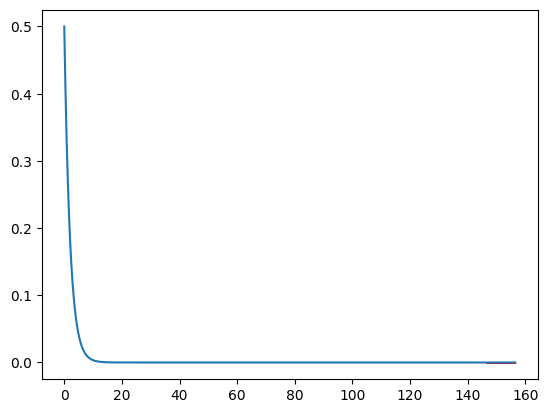

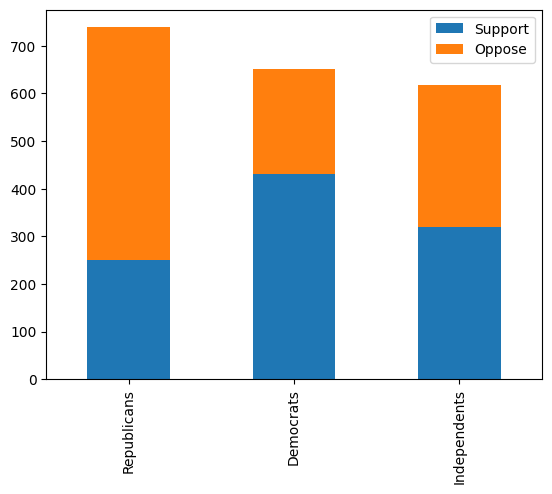

In [20]:
O = pd.DataFrame({'Support':[250,431,320], 'Oppose':[489,220,298]},
                 index= ['Republicans','Democrats','Independents'])
ChiSqIndependence(O)

The $\chi^2 = 146.45$ is very large, producing a very small p-value $= 1.5803313 \cdot 10^{-32} \ll 0.05$, so there is more than enough evidence to reject $H_0$ as shown in the chi-squared distribution Figure above. The response to the National plan is very much dependent on the party affiliation — Republicans mostly oppose any national plans, Democrats mostly support, and independents are about 50/50. We can also see it in the stacked bar plot above.

There are only two columns in this table; therefore, the problem could be rewritten from the proportion comparison point of view:

$H_0$: $p_1 = p_2 = p_3$ — proportions of support in each party are the same.

$H_1$: At least one of the proportions is different.

The proportions of support in our example are given below for Republicans, Democrats, and Independents, respectively, and according to the problem results, they are significantly different.

In [21]:
O.iloc[:,0]/O.sum(axis=1)

Republicans     0.3383
Democrats       0.6621
Independents    0.5178
dtype: float64

**Example**

A marketing study of shopping habits by social class produced the data below. Investigate if the brand choice is independent of the social class (i.e., row and column variables are independent).

$H_0$: The brand choice is independent of the social class (i.e., row and column variables are independent).

$H_1$: Dependent.

None of the expected counts below are less than 5, so $\chi^2$ approach is applicable.

         Upper Class  Middle Class  Low Class   Sum
Brand A          130           100         70   300
Brand B           30           400         70   500
Brand C           20            60         20   100
Brand D           20            40         40   100
4                200           600        200  1000
nr, nc =  4 3
Expected in cell E00 = 300*200/1000 = 60.000
Expected in cell E01 = 300*600/1000 = 180.000
Expected in the last cell = 100*200/1000 = 20.000
Chi-Squared = sum( (O-E)**2/E )= sum( Residuals**2) = 
=(130-60.00)**2/60.00 + ... + (40-20.00)**2/20.00 = 236.889
degree of freedom = df =(nr-1)(nc-1)= (4-1)(3-1) = 6
pval = 1 - chi2.cdf(X2,df) =  0.0 

From built-in chi-squared : X2 =  236.889  pval =  0.0
Expected: 
[[ 60. 180.  60.]
 [100. 300. 100.]
 [ 20.  60.  20.]
 [ 20.  60.  20.]]


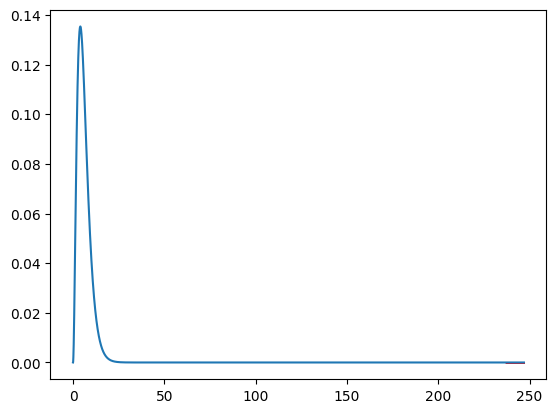

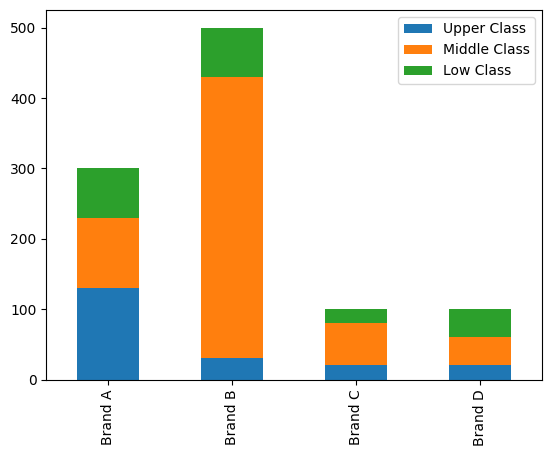

In [23]:
O = pd.DataFrame({'Upper Class':[130,30,20,20], 'Middle Class':[100,400,60,40], 'Low Class':[70,70,20,40]},
                 index= ['Brand A','Brand B','Brand C','Brand D'])
ChiSqIndependence(O)

The $\chi^2 = 236.89$ is very large, producing essentially 0 p-value $= 2.591575 \cdot 10^{-49} \ll 0.05$, as shown in the chi-squared distribution Figure above. There is more than enough evidence to reject $H_0$ — the brand choice is very much dependent on social class. We can also see it in the stacked bar plot above.

Note that in this case there are more than two row and column levels, so this problem cannot be thought of as a proportion test.

**Example**

Consider the `HELPrct` data file again. Test the claim that the gender (sex) is independent of the preferred substance (`substance`) at a 5% level.

$H_0$: The substance is independent of the gender (i.e., row and column variables are independent).

$H_1$: Dependent.

First, since the data file is available, `pd.crosstab()` is used to tabulate substance and sex (the row and column names are automatically assigned). Its output is directly fed into my function. None of the expected counts are below 5, so the $\chi^2$ test can be applied.

sex        female  male  Sum
substance                   
alcohol        36   141  177
cocaine        41   111  152
heroin         30    94  124
3             107   346  453
nr, nc =  3 2
Expected in cell E00 = 177*107/453 = 41.808
Expected in cell E01 = 177*346/453 = 135.192
Expected in the last cell = 124*346/453 = 94.711
Chi-Squared = sum( (O-E)**2/E )= sum( Residuals**2) = 
=(36-41.81)**2/41.81 + ... + (94-94.71)**2/94.71 = 2.026
degree of freedom = df =(nr-1)(nc-1)= (3-1)(2-1) = 2
pval = 1 - chi2.cdf(X2,df) =  0.3630623650067597 

From built-in chi-squared : X2 =  2.026  pval =  0.3630623650067597
Expected: 
[[ 41.80794702 135.19205298]
 [ 35.90286976 116.09713024]
 [ 29.28918322  94.71081678]]


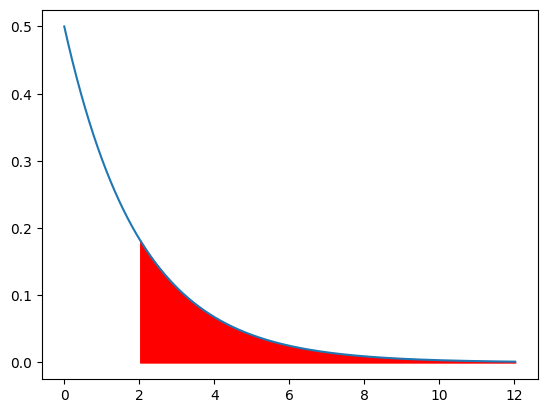

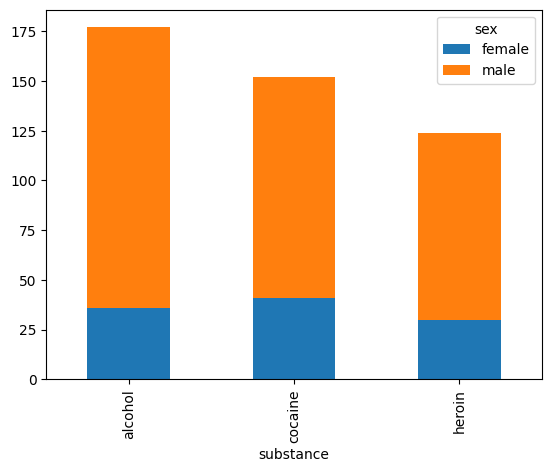

In [25]:
url=f'{base_path}/HELPrct.csv'
mydata = pd.read_csv(url)

O = pd.crosstab(mydata.substance, mydata.sex, margins=False)
ChiSqIndependence(O)

$\chi^2 = 2.026$ is very small, resulting in a large p-value $= 0.363 > 0.05$, as shown in the chi-squared distribution Figure above. Therefore, there is not enough evidence to reject $H_0$ — substance is independent of gender. The stacked bar plot above shows it as well.

With only two columns, the problem can be reformulated as a proportion test:

$H_0$: $p_1 = p_2 = p_3$ — proportions of males in each substance.

$H_1$: At least one of the proportions is different.

The observed proportions of males for each substance are:

In [26]:
O.iloc[:,1]/O.sum(axis=1)

substance
alcohol    0.7966
cocaine    0.7303
heroin     0.7581
dtype: float64

Based on the results, these proportions are not significantly different.

**Example**

Let's come back to an example considered in the previous chapter. First, we repeat the main idea that 87 out of 100 students preparing with the Barron guide passed the Medical admission test MCAT, while 91 out of 120 passed it with the Princeton guide. Is there a significant difference at the 1% level? How about a 5% level?

We recast this problem as a contingency table as follows: test the claim that passing is independent of the type of review used (i.e., row and column variables are independent).

        Barrons  Princeton  Sum
Passed       87         91  178
Failed       13         29   42
2           100        120  220
nr, nc =  2 2
Expected in cell E00 = 178*100/220 = 80.909
Expected in cell E01 = 178*120/220 = 97.091
Expected in the last cell = 42*120/220 = 22.909
Chi-Squared = sum( (O-E)**2/E )= sum( Residuals**2) = 
=(87-80.91)**2/80.91 + ... + (29-22.91)**2/22.91 = 4.403
degree of freedom = df =(nr-1)(nc-1)= (2-1)(2-1) = 1
pval = 1 - chi2.cdf(X2,df) =  0.03586871998573926 

From built-in chi-squared : X2 =  4.403  pval =  0.03586871998573926
Expected: 
[[80.90909091 97.09090909]
 [19.09090909 22.90909091]]


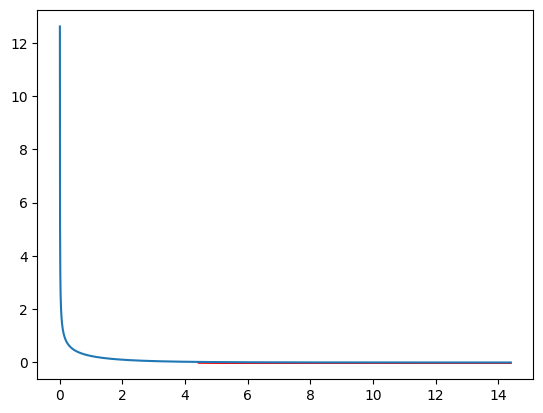

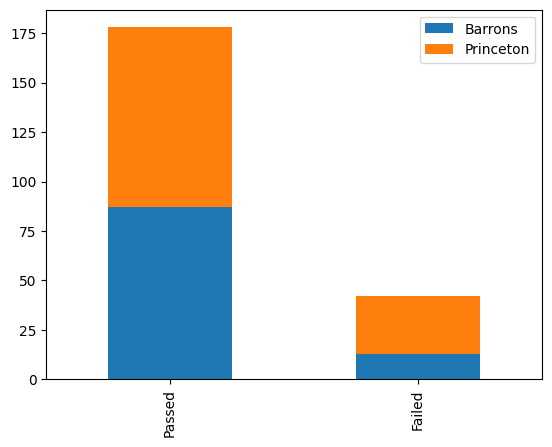

In [27]:
O = pd.DataFrame({'Barrons':[87,13], 'Princeton':[91,29]},
                 index= ['Passed','Failed'])
ChiSqIndependence(O)

$\chi^2 = 4.4033$ results in p-value $= 0.0358 > 0.01$, as shown in the chi-squared distribution Figure above. Therefore, there is *not* enough evidence to reject $H_0$ at 0.01 level, so at this stricter level, the MCAT passing is independent of the preparation type. We can also see it in the stacked bar plot above.

On the other hand, if $\alpha = 0.05$ were used, we would have rejected $H_0$.

Comparing these results with the 2-proportions test in the previous chapter, we notice that the p-values are the same and $z^2 = 2.0982^2 = 4.4033 = \chi^2$, which is true in general.